In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as plt

In [2]:
def calc_ci(df, alpha):
    n = len(df)
    s = df.var(ddof=1) ** 0.5
    m = df.mean()
    isf = stats.t.isf(alpha/2, n-1)     #方差未知，用样本方差，做t检验
    moe = isf * s / (n ** 0.5)
    return m-moe, m+moe

In [3]:
beforeCD11b=np.array([6.83, 3.91, 5.57, 5.4, 5.4])
print(calc_ci(beforeCD11b, 0.05))
print(beforeCD11b.var(ddof=1)**0.5)
print(beforeCD11b.mean())

(4.135891407397427, 6.7081085926025725)
1.035794381139423
5.422


In [4]:
beforeCD3=np.array([21.6, 28.3, 25.7, 25.2, 25.2])
print(calc_ci(beforeCD3, 0.05))
print(beforeCD3.var(ddof=1)**0.5)
print(beforeCD3.mean())

(22.2342679303916, 28.165732069608406)
2.388514182499237
25.200000000000003


In [5]:
afterTCD11b=np.array([45.2, 46.5, 51.7, 18.0, 22.3])
print(calc_ci(afterTCD11b, 0.05))
print(afterTCD11b.var(ddof=1)**0.5)
print(afterTCD11b.mean())

(17.60132930163103, 55.87867069836898)
15.413727647782025
36.74


In [6]:
afterTCD3=np.array([8.97, 8.75, 7.96, 21.2, 16.7])
print(calc_ci(afterTCD3, 0.05))
print(afterTCD3.var(ddof=1)**0.5)
print(afterTCD3.mean())

(5.364140075853521, 20.06785992414648)
5.920973737486089
12.716


In [7]:
afterFCD11b=np.array([3.95, 2.61, 4.58, 5.85, 2.87])
print(calc_ci(afterFCD11b, 0.05))
print(afterFCD11b.var(ddof=1)**0.5)
print(afterFCD11b.mean())

(2.333370418708878, 5.610629581291123)
1.3197045123814648
3.9720000000000004


In [8]:
afterFCD3=np.array([20.5, 25.9, 23.5, 20.6, 21.3])
print(calc_ci(afterFCD3, 0.05))
print(afterFCD3.var(ddof=1)**0.5)
print(afterFCD3.mean())

(19.48051720489714, 25.23948279510286)
2.31905153025973
22.36


In [9]:
import pingouin as pg

In [10]:
CD11b = pd.DataFrame({
    'Value': np.concatenate([beforeCD11b, afterTCD11b, afterFCD11b]),
    'Group': ['Before'] * 5 + ['AfterT'] * 5 + ['AfterF'] * 5,
    'TimePoint': ['CD11b'] * 10 + ['CD11b'] * 5
})

print(CD11b)

    Value   Group TimePoint
0    6.83  Before     CD11b
1    3.91  Before     CD11b
2    5.57  Before     CD11b
3    5.40  Before     CD11b
4    5.40  Before     CD11b
5   45.20  AfterT     CD11b
6   46.50  AfterT     CD11b
7   51.70  AfterT     CD11b
8   18.00  AfterT     CD11b
9   22.30  AfterT     CD11b
10   3.95  AfterF     CD11b
11   2.61  AfterF     CD11b
12   4.58  AfterF     CD11b
13   5.85  AfterF     CD11b
14   2.87  AfterF     CD11b


In [11]:
aovCD11b = pg.anova(data=CD11b, dv="Value", between="Group", detailed=True,effsize="np2")
print(aovCD11b)

   Source          SS  DF           MS          F     p-unc       np2
0   Group  3427.76908   2  1713.884540  21.388134  0.000111  0.780927
1  Within   961.58996  12    80.132497        NaN       NaN       NaN


In [12]:
pt11 = CD11b.pairwise_tukey(dv="Value", between="Group")
print(pt11)

        A       B  mean(A)  mean(B)    diff        se         T   p-tukey  \
0  AfterF  AfterT    3.972   36.740 -32.768  5.661537 -5.787828  0.000236   
1  AfterF  Before    3.972    5.422  -1.450  5.661537 -0.256114  0.964592   
2  AfterT  Before   36.740    5.422  31.318  5.661537  5.531714  0.000352   

     hedges  
0 -2.705625  
1 -1.104026  
2  2.589520  


In [13]:
CD3 = pd.DataFrame({
    'Value': np.concatenate([beforeCD3, afterTCD3, afterFCD3]),
    'Group': ['Before'] * 5 + ['AfterT'] * 5 + ['AfterF'] * 5,
    'TimePoint': ['CD3'] * 10 + ['CD3'] * 5
})

print(CD11b)

    Value   Group TimePoint
0    6.83  Before     CD11b
1    3.91  Before     CD11b
2    5.57  Before     CD11b
3    5.40  Before     CD11b
4    5.40  Before     CD11b
5   45.20  AfterT     CD11b
6   46.50  AfterT     CD11b
7   51.70  AfterT     CD11b
8   18.00  AfterT     CD11b
9   22.30  AfterT     CD11b
10   3.95  AfterF     CD11b
11   2.61  AfterF     CD11b
12   4.58  AfterF     CD11b
13   5.85  AfterF     CD11b
14   2.87  AfterF     CD11b


In [14]:
aovCD3 = pg.anova(data=CD3, dv="Value", between="Group", detailed=True,effsize="np2")
print(aovCD3)

   Source         SS  DF         MS          F     p-unc       np2
0   Group  428.20432   2  214.10216  13.920536  0.000747  0.698803
1  Within  184.56372  12   15.38031        NaN       NaN       NaN


In [15]:
pt3 = CD3.pairwise_tukey(dv="Value", between="Group")
print(pt3)

        A       B  mean(A)  mean(B)    diff        se         T   p-tukey  \
0  AfterF  AfterT   22.360   12.716   9.644  2.480348  3.888165  0.005649   
1  AfterF  Before   22.360   25.200  -2.840  2.480348 -1.145001  0.506287   
2  AfterT  Before   12.716   25.200 -12.484  2.480348 -5.033166  0.000790   

     hedges  
0  1.937246  
1 -1.089685  
2 -2.497655  


In [16]:
import seaborn as sns
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Before v.s. AfterT: t-test independent samples with Bonferroni correction, P_val=5.750e-03 stat=-4.533e+00
AfterT v.s. AfterF: t-test independent samples with Bonferroni correction, P_val=4.413e-03 stat=4.736e+00
Before v.s. AfterF: t-test independent samples with Bonferroni correction, P_val=2.681e-01 stat=1.933e+00


(<Axes: xlabel='Group', ylabel='Value'>,
  <statannot.StatResult.StatResult at 0x2665b0b2490>])

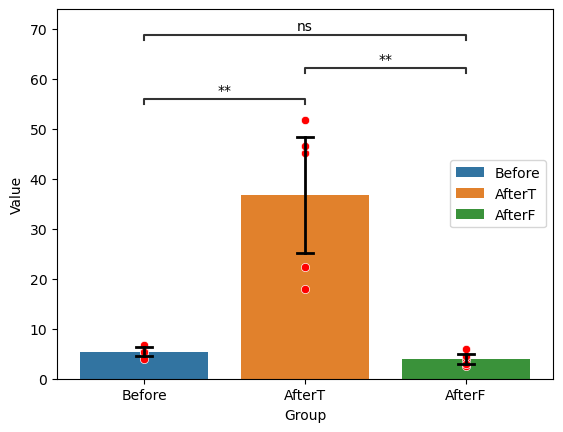

In [17]:
ax = sns.barplot(data=CD11b, x="Group", y="Value", hue="Group", errorbar=("ci", 95), errcolor="black",
            capsize=0.1, errwidth=2, dodge=False)
sns.scatterplot(data=CD11b, x="Group", y="Value", color="r")
significant_pairs = [("Before", "AfterT"), ("Before", "AfterF")]
add_stat_annotation(ax=ax, data=CD11b, x="Group", y="Value",
                    box_pairs=[("Before", "AfterT"), ("Before", "AfterF"), ("AfterT", "AfterF")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Before v.s. AfterT: t-test independent samples with Bonferroni correction, P_val=5.750e-03 stat=-4.533e+00
AfterT v.s. AfterF: t-test independent samples with Bonferroni correction, P_val=4.413e-03 stat=4.736e+00
Before v.s. AfterF: t-test independent samples with Bonferroni correction, P_val=2.681e-01 stat=1.933e+00


(<Axes: xlabel='Group', ylabel='Value'>,
  <statannot.StatResult.StatResult at 0x2665af191d0>])

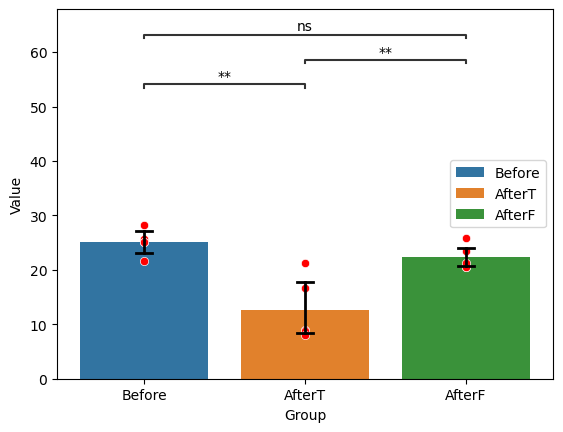

In [18]:
ax = sns.barplot(data=CD3, x="Group", y="Value", hue="Group", errorbar=("ci", 95), errcolor="black",
            capsize=0.1, errwidth=2, dodge=False)
sns.scatterplot(data=CD3, x="Group", y="Value", color="r")
significant_pairs = [("Before", "AfterT"), ("Before", "AfterF")]
add_stat_annotation(ax=ax, data=CD11b, x="Group", y="Value",
                    box_pairs=[("Before", "AfterT"), ("Before", "AfterF"), ("AfterT", "AfterF")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)